# Machine Learning: Assignment - 2 (Group 93)

 ## Problem Statement: From the given dataset (`loan_data.csv`) build a classifier model to predict whether or not the borrower has paid back their loan in full.

### Import required libraries        


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

### 1. Load the dataset and print the metadata in the notebook.

In [2]:
loan_dataset = pd.read_csv("loan_data.csv")

#Print first five records from the fetched dataset
loan_dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


#### Printing metadata of the dataset

In [3]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### Note:- We can see from the above metadata information the `purpose` column is of type `object` which we will convert before (point 4 - mentioned below) running classifier algorithm. 
#### Since model training can not be done on `object` and `string`  directly.

### 2. Create a countplot using sns showing the counts of loans by purpose,  with the color hue defined by not.fully.paid.

In [4]:
print('\033[1m' + 'Unique Purpose Count =' + '\033[0m', loan_dataset.purpose.nunique())

Unique Purpose Count = 7


In [5]:
print('\033[1m' + 'Unique Purpose Values = '+ '\033[0m', loan_dataset.purpose.unique())

Unique Purpose Values =  ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


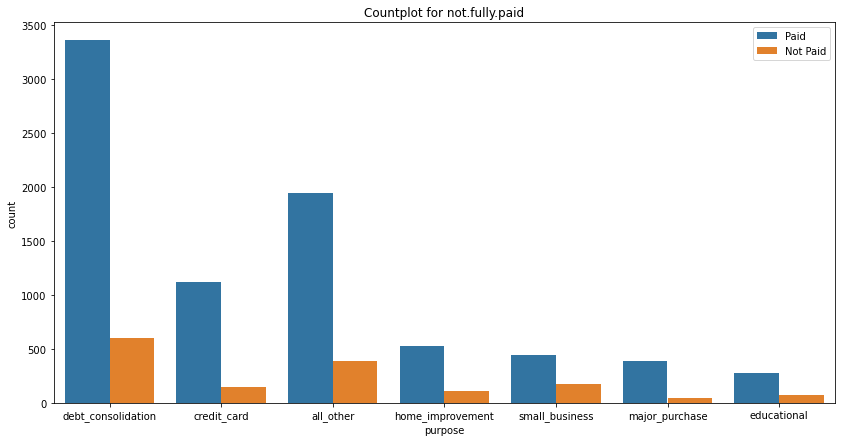

In [6]:
plt.figure(figsize=(14,7))
#Countplot using Seaborn lib to show the counts of loans by `purpose` with hue `not.fully.paid`
ax = sns.countplot(x='purpose', data=loan_dataset, hue='not.fully.paid')
#Updating legend to display `0 - Paid` & `1 - Not fully Paid`
legend=plt.legend()
legend.get_texts()[0].set_text('Paid')
legend.get_texts()[1].set_text('Not Paid')
plt.title('Countplot for not.fully.paid')
plt.show()

### 3. Print a heatmap to check NULL values

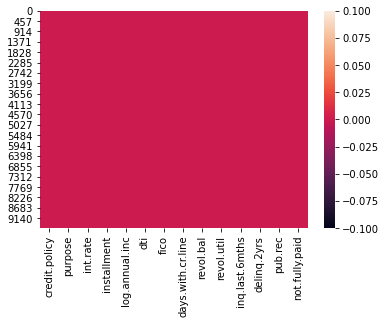

In [7]:
sns.heatmap(loan_dataset.isnull())

#### Note: From the above heatmap we can conclude that none of the colun contains the NULL values.

### 4. Perform startified splitting of train and test data

##### Since we mentioned above training of model can't happen on `string` type column therefore we are transforming the string values to respective numerical values using `LabelEncoder`.

In [8]:
# References 
# - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# - https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in the same dataset `purpose` column
loan_dataset['purpose'] = labelencoder.fit_transform(loan_dataset['purpose'])

In [9]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


##### We can see the `purpose` column is now of type `int64`. Now we can use this of training model.

#### Prepare Independent variable data (X-Axis)

In [10]:
X = loan_dataset.iloc[:, :-1]
X.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


#### Prepare dependent variable data (Y-Axis)

In [11]:
y = loan_dataset.iloc[:, [-1]]
y.head()

,not.fully.paid
0,0
1,0
2,0
3,0
4,0


#### Using stratify splitting the dataset into training and testing datasets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [13]:
print("X-axis training data - ", X_train.shape)
print("X-axis test data     - ", X_test.shape)
print("Y-axis training data - ", y_train.shape)
print("Y-axis test data     - ", y_test.shape)

X-axis training data -  (7662, 13)
X-axis test data     -  (1916, 13)
Y-axis training data -  (7662, 1)
Y-axis test data     -  (1916, 1)


### 5. Build a classifier model using Adaboost Classifier algorithm

In [14]:
# Creating `AdaBoostClassifier` using `DecisionTreeClassifier`
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

#Build a boosted classifier from the training set (X, y).
model = classifier.fit(X_train, y_train)

# Predict classes for training data.
y_predictions = classifier.predict(X_test)

/Users/muditjain/opt/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### 6. Print confusion matrix and classification report

#### Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
# Printing the confusion matrix
confusion_matrix(y_test, y_predictions) 

array([[1598,   11],
       [ 299,    8]])

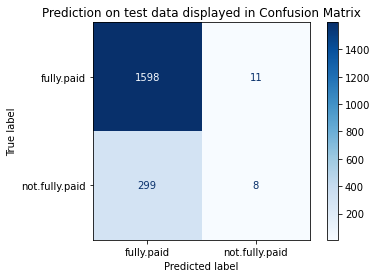

In [16]:
from sklearn.metrics import plot_confusion_matrix

labels = ['fully.paid', 'not.fully.paid']

plot_confusion_matrix(classifier, X_test, y_test,
                     display_labels=labels,
                     cmap=plt.cm.Blues,
                     normalize=None)
plt.title('Prediction on test data displayed in Confusion Matrix')
plt.show()

#### Classification Report

In [17]:
from sklearn.metrics import classification_report
# Display classification report against respective classes
print(classification_report(y_test, y_predictions, target_names=labels))

                precision    recall  f1-score   support

    fully.paid       0.84      0.99      0.91      1609
not.fully.paid       0.42      0.03      0.05       307

      accuracy                           0.84      1916
     macro avg       0.63      0.51      0.48      1916
  weighted avg       0.77      0.84      0.77      1916



### 7. Find out the stratified cross validation accuracy

In [18]:
# References -
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85

from sklearn.model_selection import cross_val_score

stratified_cross_validation_accuracy = cross_val_score(model, X, y.values.ravel(), cv = 10)

print("Stratified Cross validation accuracy results with 10-folds \n", stratified_cross_validation_accuracy)

Stratified Cross validation accuracy results with 10-folds 
 [0.84133612 0.84029228 0.84133612 0.83924843 0.84029228 0.83820459
 0.84237996 0.84446764 0.6969697  0.57680251]


#### Note: In the above `cross_val_score` we have chosen `cv` value as `10` since after running it for 5 times we found the average accuracy was lesser (approx ~0.73), although it will increase a little bit of computation time. Also for cv=20 avg. accuracy ~0.83 however computation time was fairly more.

In [19]:
print('Average accuracy of model with Cross Validation of 10-folds is %0.2f' % stratified_cross_validation_accuracy.mean())

print("with standard deviation of %0.2f" % stratified_cross_validation_accuracy.std())

Average accuracy of model with Cross Validation of 10-folds is 0.80
with standard deviation of 0.09
